# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [176]:
df.shape

(1898, 10)

Observations: There are 1898 rows and 9 columns in this data dictionary.

Total number of Rows: 1898

Total number of Columns: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [177]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_time               0
dtype: int64

#### Observations:
There are no columns that have null or empty records.

There are no missing values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here
# Using the describe function on the column 'food_preparation_time' : df.describe().T

df['food_preparation_time'].describe().T

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations: 
Minimum food prepation time : 20 mins

Average food prepation time : 27.37 min

Maximum food prepation time : 35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [178]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
Total number of orders not rated are: 736

The lowest rating given is 3 and the highest rating given is 5.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### For univariate data analysis, following can be reviewed for each data series / column:
1. Restaurant with the maximum number of orders (Most popular restaurant)
2. Listing number of unique restaurants
3. Unique restaurant names 
4. Unique cuisine types
5. Total Unique customers count
6. Total Unique customers orders and inference Max and min customer orders.
7. Total number of orders
8. Weekday / Weekend - identifying most popular food ordering day pattern (Rush hour/day)
9. Unique ratings
10.  The cost distibution
11. Food preparation time 



##### 1. Restaurant with the maximum number of orders (Most popular restaurant)

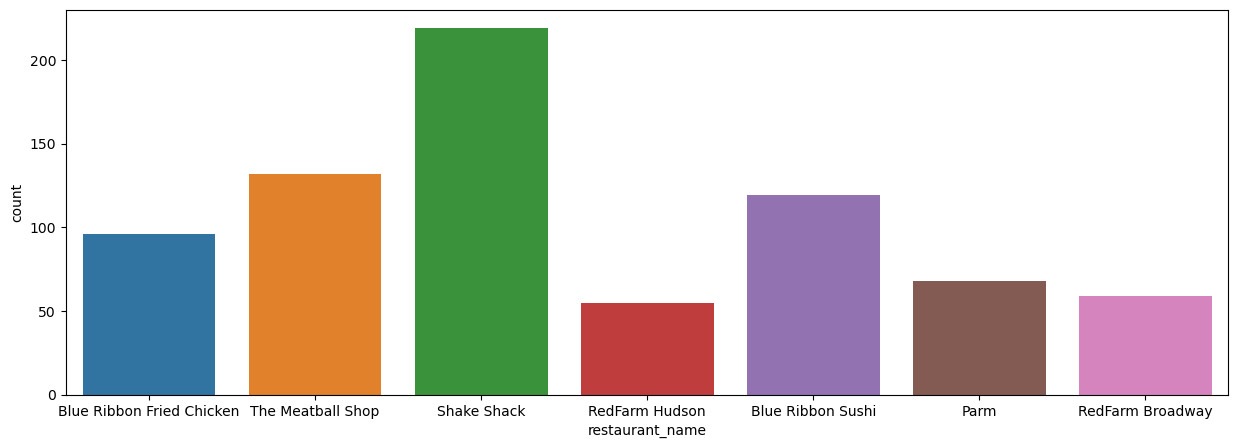

In [179]:
# 1. Restaurant with the maximum number of orders (Most popular restaurant)
#df['restaurant_name'].value_counts() >100

# Creating a countplot of restaurants that have received more than 50 orders.
plt.figure(figsize = (15,5))
popular_restaurants = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 50]
sns.countplot(data = popular_restaurants, x = 'restaurant_name'); 

#### Observations:
1. The MOST POPULAR restaurant is <b>Shake Shack</b> with maximum number of orders.
2. The <b> Meatball Shop </b> is the second highest ordered restaurant.

##### 2. Listing number of unique restaurants


In [180]:
df['restaurant_name'].nunique()  

178

#### Observations:

There are a tolal of 178 unique restaurants in the dataset.

##### 3. Listing number of unique restaurants


In [181]:
df['restaurant_name'].unique().tolist()


['Hangawi',
 'Blue Ribbon Sushi Izakaya',
 'Cafe Habana',
 'Blue Ribbon Fried Chicken',
 'Dirty Bird to Go',
 'Tamarind TriBeCa',
 'The Meatball Shop',
 'Barbounia',
 'Anjappar Chettinad',
 'Bukhara Grill',
 'Big Wong Restaurant \x8c_¤¾Ñ¼',
 'Empanada Mama (closed)',
 'Pylos',
 "Lucky's Famous Burgers",
 'Shake Shack',
 'Sushi of Gari',
 'RedFarm Hudson',
 'Blue Ribbon Sushi',
 'Five Guys Burgers and Fries',
 'Tortaria',
 'Cafe Mogador',
 'Otto Enoteca Pizzeria',
 'Vezzo Thin Crust Pizza',
 'Sushi of Gari 46',
 'The Kati Roll Company',
 'Klong',
 '5 Napkin Burger',
 'TAO',
 'Parm',
 'Sushi Samba',
 'Haru Gramercy Park',
 'Chipotle Mexican Grill $1.99 Delivery',
 'RedFarm Broadway',
 'Cafeteria',
 'DuMont Burger',
 "Sarabeth's East",
 'Hill Country Fried Chicken',
 'Bistango',
 "Jack's Wife Freda",
 "Mamoun's Falafel",
 'Prosperity Dumpling',
 'Blue Ribbon Sushi Bar & Grill',
 'Westville Hudson',
 'Blue Ribbon Brooklyn',
 'Nobu Next Door',
 'Osteria Morini',
 'Haandi',
 'Benihana',
 'Ha

##### 4. Unique cuisine types


In [13]:
df['cuisine_type'].unique().tolist()

['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

##### 5. Total Unique customers count


In [14]:
df['customer_id'].nunique()

1200

There were a total of 1200 customers that placed a total of 1898 orders (from df.shape)

##### 6. Total Unique customers orders and inference Max and min customer orders.


In [15]:
# 6. Total Unique customers orders and inference Max and min customer orders.
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
1. The maximum number of orders placed by a cutomer is 13 orders and least order coutn is 1.
2. This would help us identify the high value customers. 
3. Customer's that order more and the popular cuisines as well that are getting ordered multiple times.

##### 7. Total number of orders


In [16]:
df.shape

# There are a total of 1898 orders placed from the order list

(1898, 9)

##### 8. Weekday / Weekend - identifying most popular food ordering day pattern (Rush hour/day)


In [17]:
#8. Weekday / Weekend - identifying most popular food ordering day pattern (Rush hour/day)

df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

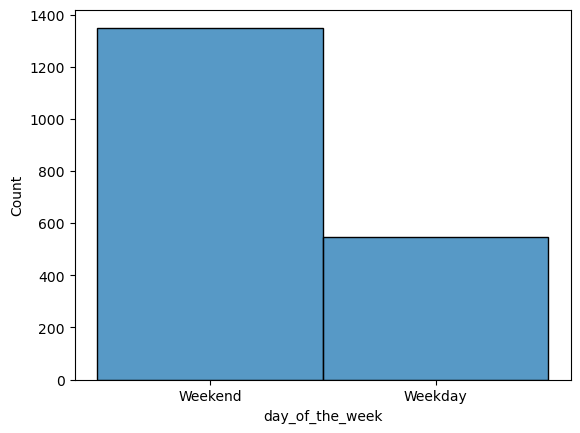

In [18]:
sns.histplot(data=df,x='day_of_the_week')
plt.show()

#### Observations:
Based on the value count, customers have placed more orders on the weekend than on weekdays

##### 9. Unique ratings count


In [19]:
#9. Unique ratings
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

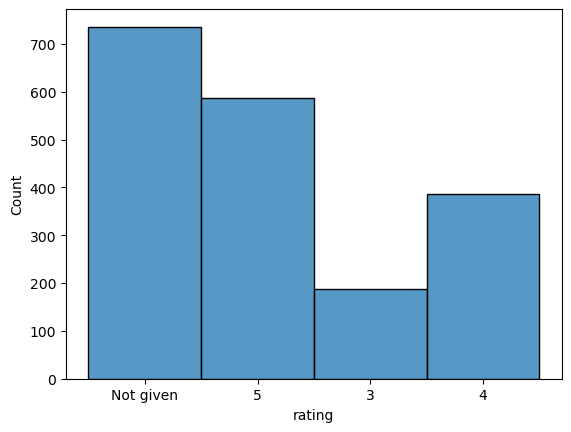

In [20]:
sns.histplot(data=df,x='rating')
plt.show()

##### Observations:
1. These are the number of ratings counts that have been given so far.
2. Most of the users have not given any ratings to the orders
3. None of the users have rated the restaurants below 3

##### 10. The cost distibution


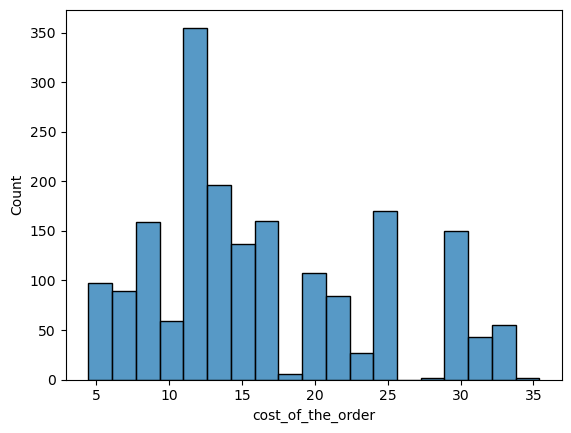

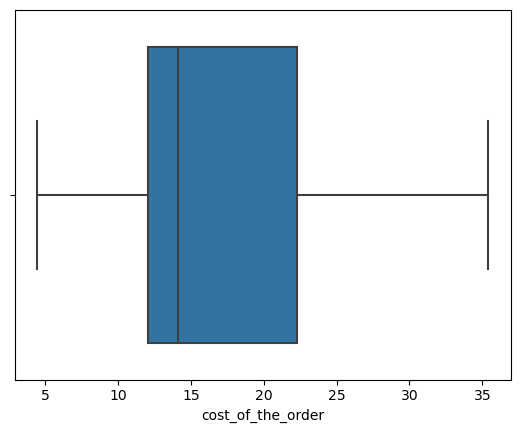

In [21]:
#10. The cost distibution count

sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

##### Observations:

This gives us the median amount spent by most of the customers.

1. From the above graph, we can see that the around 350customers spend around $11 on an order.
2. Ther are no outliers in the restaurants with some very expensive dishes getting ordered.


##### 11. Food preparation time


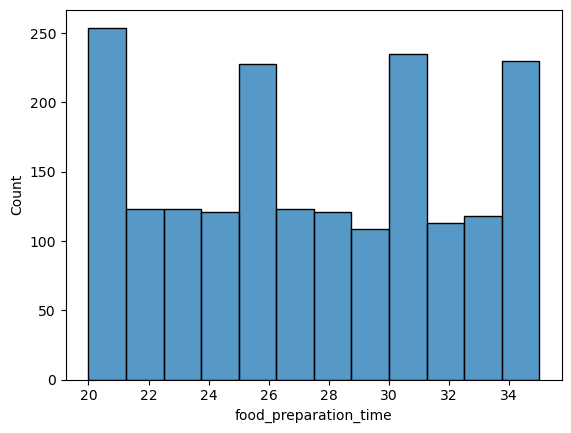

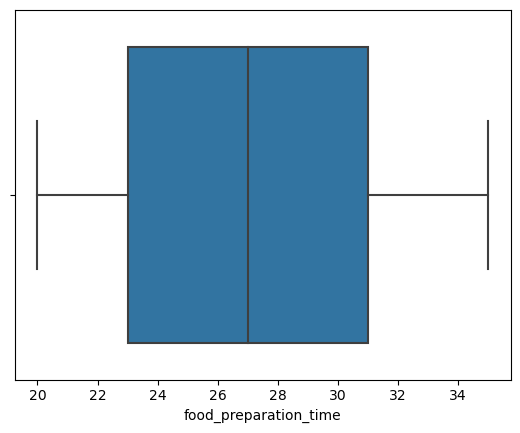

In [22]:
# (11) Food preparation time 

sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

##### Observations:
1. The average time to prepare food is 27 minutes.
2. Minimum time to prepare food taken by the restaurants is 21 minutes and most of the restaurants prepare the food 
very fast.
3. There are no outliers in the food preparation time.

In [23]:
# Similarly, the least famous restaurant (not by the ratings, but the number of orders received.)
# Getting a value count of the number of times a restaurant got an order.
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [24]:
# Getting a stastical summary of all the columns in the dataset
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

<Axes: xlabel='restaurant_name', ylabel='count'>

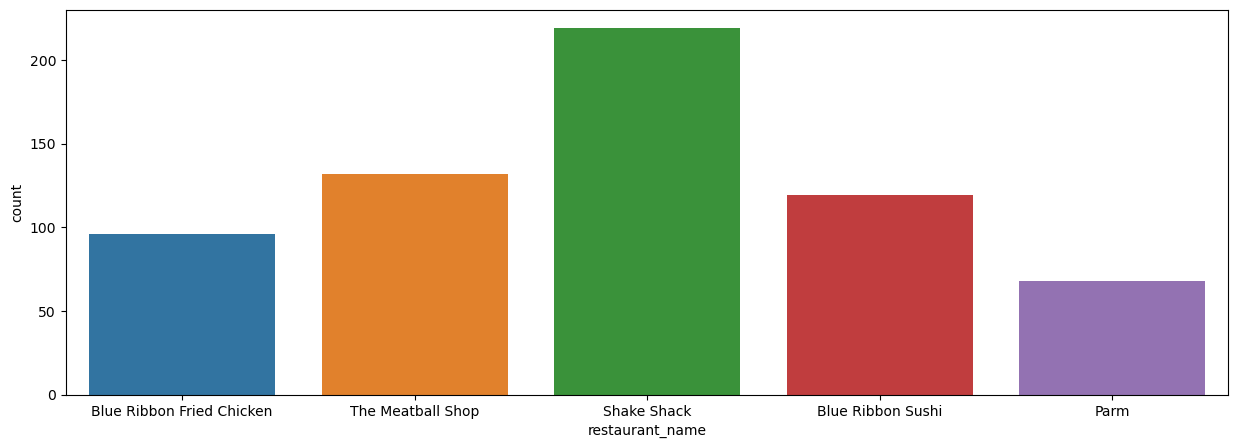

In [25]:
# Write the code here

# Creating a countplot of restaurants that have received more than 50 orders.
plt.figure(figsize = (15,5))
popular_restaurants = df[df['restaurant_name'].map(df['restaurant_name'].value_counts()) > 60]
sns.countplot(data = popular_restaurants, x = 'restaurant_name') 

#### Observations:
Hence the top 5 restaurants from the above observation is:
1) Shake Shack
2) The Meatball Shop	
3) Blue Ribbon Sushi	
4) Blue Ribbon Fried Chicken
5) Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Write the code here

data_copy1 = df.copy()

# Getting the count of cuisines for all the orders on the weekend from the dataset.
def weekend_cuisine_func(var1, var2):
    if (var1 == 'Weekend'):
        return var2

data_copy1['weekend_cuisine'] = data_copy1.apply(lambda x: weekend_cuisine_func(x['day_of_the_week'], x['cuisine_type']), axis = 1)
data_copy1['weekend_cuisine'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: weekend_cuisine, dtype: int64

#### Observations:
Based on the count of orders on the weekend of various cuisin types, the most popular cuisine is <b>American</b>

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

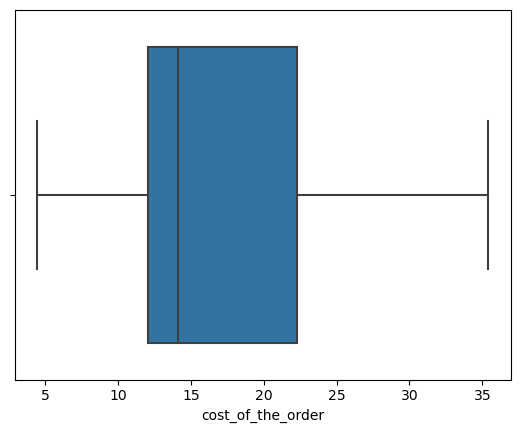

The number of orders above $20 is 29.24130663856691


In [27]:
# Write the code here
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()


# From the boxplot, we can see that majority of the orders are below $20. 
# Getting the percentage of orders that are above $20

# Get count of values greater than 20 in the column 'cost_of_the_order' 
def percentageCount(amountLimit):
    count = (df['cost_of_the_order'] > amountLimit).sum()
    percentage_up_20 = (count/df.shape[0])*100
    return percentage_up_20


print('The number of orders above $20 is', percentageCount(20));

#### Observations:
Percentage of the orders cost more than 20 dollars = 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:


The mean delivery time is: 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [36]:
# Write the code here 'customer_id'

# We can get the top customers by getting the number orders placed by each customer. 
# We can get this by getting the value count of each customer Id.
def topcustomers(count):
    customers = df['customer_id'].value_counts().head(count)
    return customers;

print('The top customers are: ')
print('ID      orders')
print(topcustomers(3))

The top customers are: 
ID      orders
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Multivariate analysis can be perform between the attributes for the following use cases:

1. Usual delivery time on weekdays vs weekends
Analysing result: We can get the time of delivery on weekdays and weekends.

2. Food Preparation time vs the delivery time on weekdays and weekends
Analysing result: What causes the delay in delivery of food to the customer, food prep or food delivery

3. Cuisine vs Food Preparation time
Analysing result: Which cuisine takes longer to prepare.

    3(a) Outlier detection : Korean Food
    

4. Revenue generated by each restaurant
Analysing result: Analyse the revenue generated by the restaurants

5. Rating and Delivery time
Analysing result: Impact of delivery time on the rating given

6. Rating & Food preparation time
Analysing result: Impact of Food preparation time on the rating given

7. Rating & cost of the order
Analysing result: Impact of cost of the order on the rating given

8. Cost of the order and cuisine type comparison 
Analysing result: This would help the customers identify the cost of a meal based on the cuisine type.

    8(a). Cost of the order  - Outlier detection - Korean
    
    8(b). Cost of the order  - Outlier detection - Mediterranean
    
    8(c). Cost of the order  - Outlier detection - Vietnamese




#### 1. Usual delivery time on weekdays vs weekends
#### Analysing result: We can get the time of delivery on weekdays and weekends.


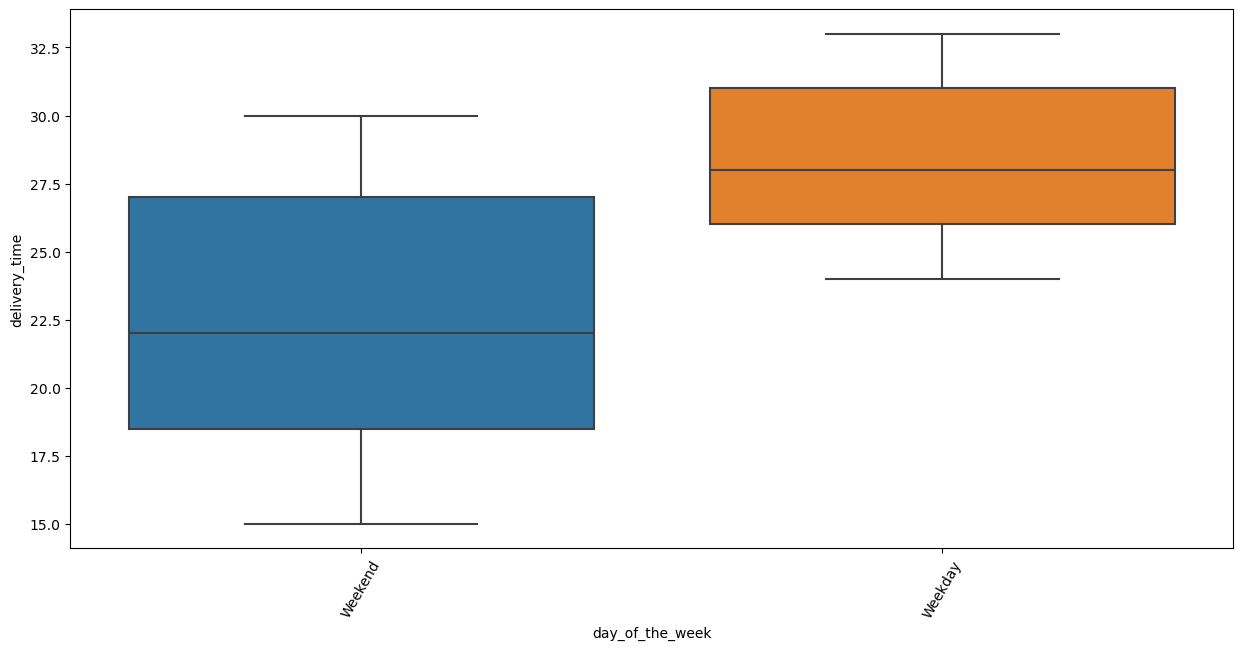

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

#### Observations
1. The delivery time on weekday is more compared to weekends.
2. With this, we can derive that the delivery time gets impacted by either Food Hub delivery folks or the restaurant delivery time.
3. We can check this by a correlation between : delivery_time, day_of_the_week and food_preparation_time

#### 2. Food Preparation time vs the delivery time on weekdays and weekends
#### Analysing result: What causes the delay in delivery of food to the customer, food prep or food delivery


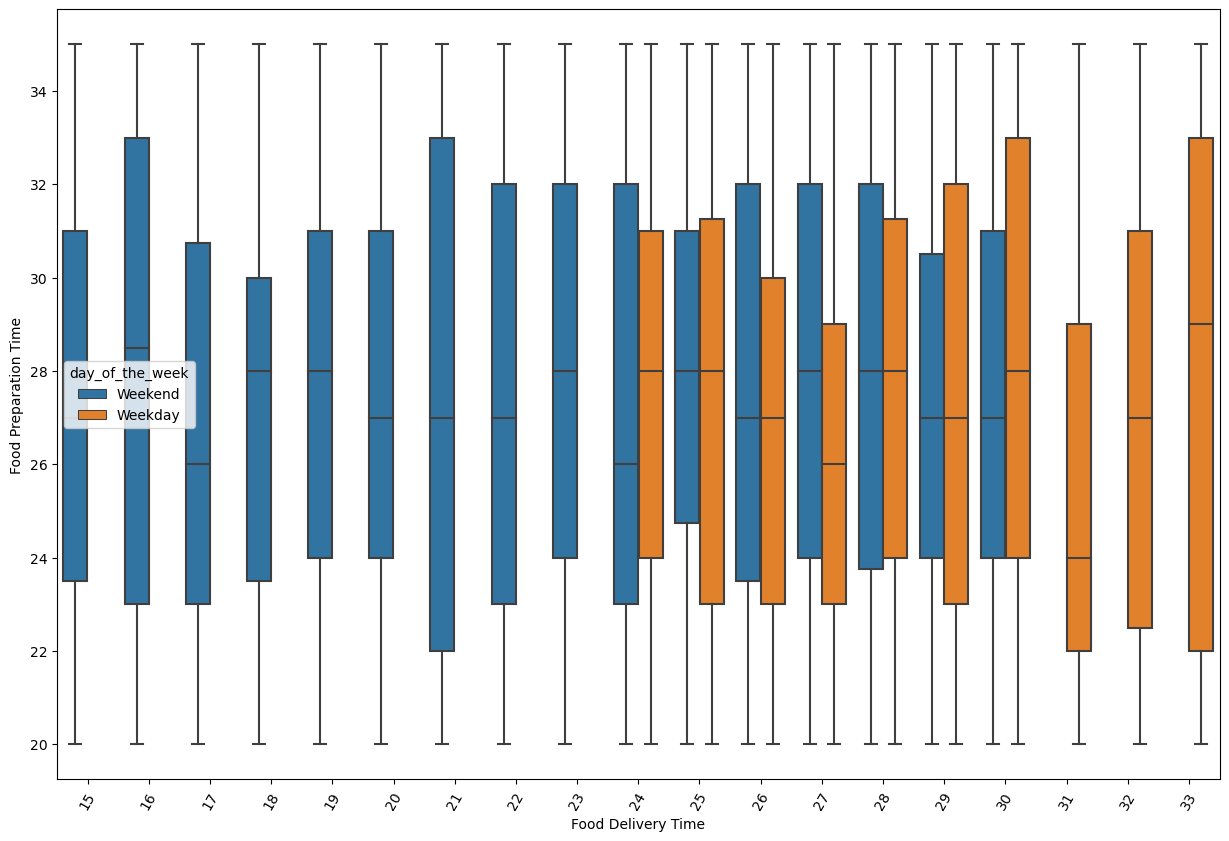

In [111]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "delivery_time", y = "food_preparation_time", data = df, hue='day_of_the_week')
plt.ylabel('Food Preparation Time')
plt.xlabel('Food Delivery Time')
plt.xticks(rotation = 60)
plt.show()


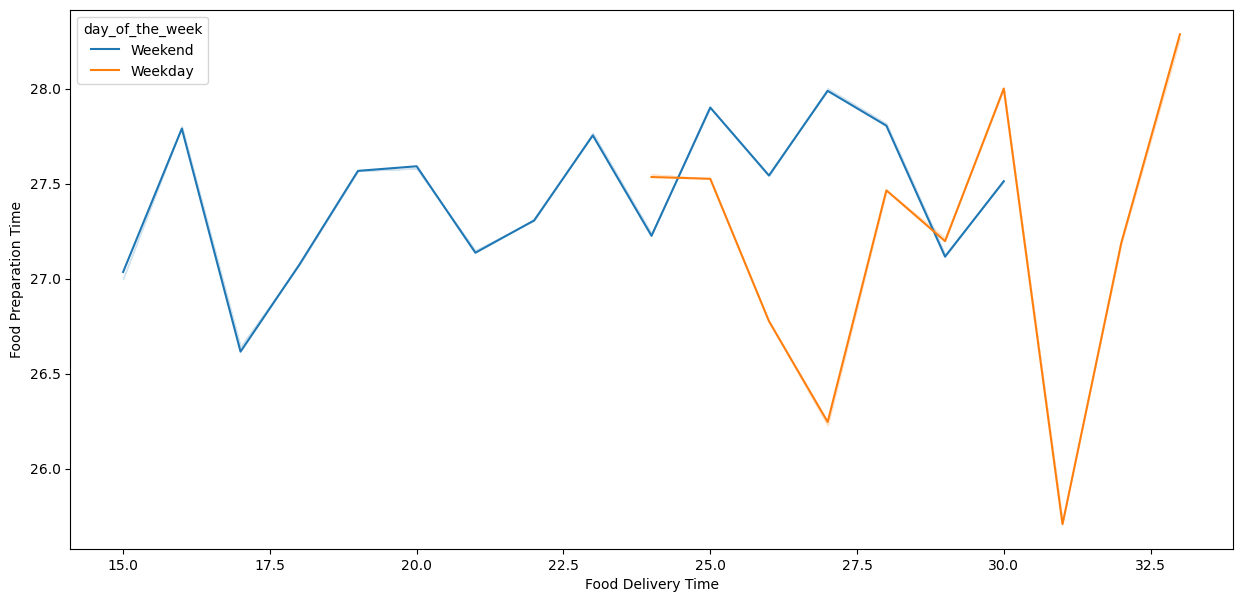

In [39]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="delivery_time", y="food_preparation_time", hue='day_of_the_week',  
             errorbar=('ci', False))
plt.ylabel('Food Preparation Time')
plt.xlabel('Food Delivery Time')
plt.show()

#### Observations
Both the above graph shows a similar pattern:
We can infer the following from the above pattern:

1. The food preparation time is almost the same in weekdays and weekends.
2. The delivery time is more on the weekday compared to weekends.

Hence, we can infer that the restaurants pace of preparing the food is consistent. However, Food hub takes longer to deliver on weekdays compared to weekends. This could be related to the staff / drivers availalbity over weekends and weekdays.

#### 3. Cuisine vs Food Preparation time
#### Analysing result: Which cuisine takes longer to prepare.

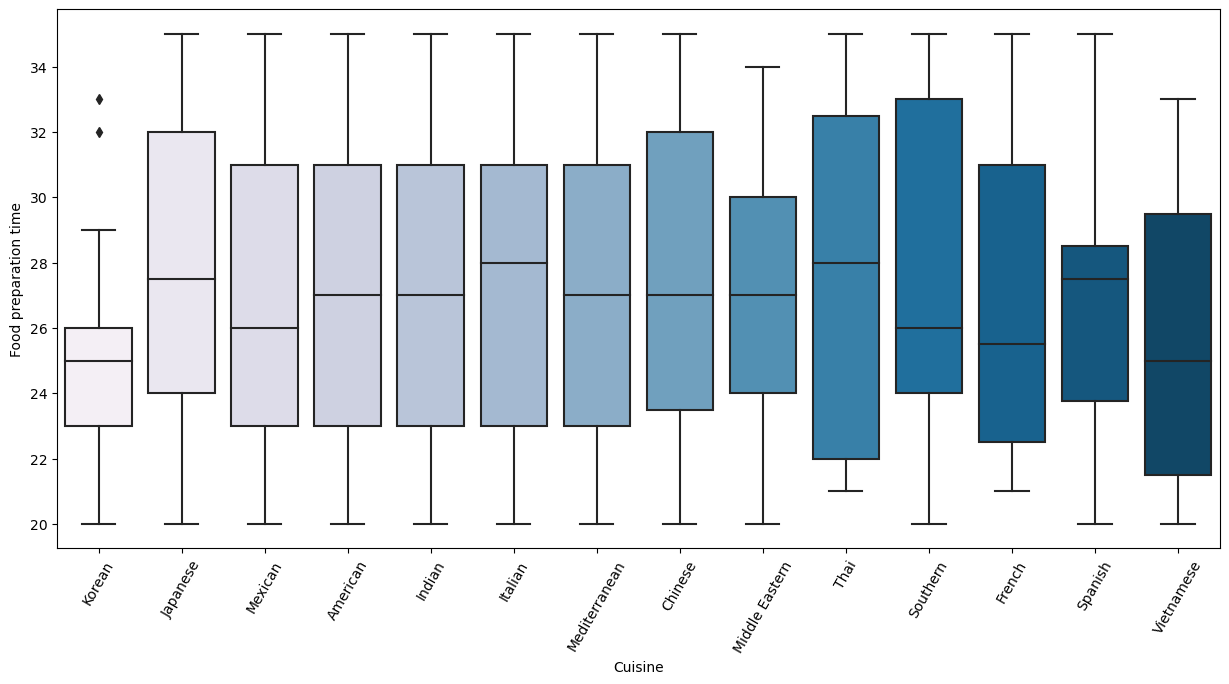

In [183]:
# df.head()

plt.figure(figsize=(15,7))
sns.boxplot(x=df['cuisine_type'], y=df['food_preparation_time'], palette = 'PuBu')
plt.ylabel('Food preparation time')
plt.xlabel('Cuisine')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Observations
1. We see that mean preparation time for all the cuisines are between 24-28 minutes
2. Thre are some outliers in the Korean dishes that has taken mroe time to prepare compared to the average time.
3. All the other  cuisines have no outliers in the preparation time.

#### 3(a) Outlier detection : Korean Food

In [184]:
df.loc[df['cuisine_type']=='Korean']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
301,1476856,59674,Woorijip,Korean,8.25,Weekend,3,26,26,52
464,1477600,347263,Hangawi,Korean,6.74,Weekend,Not given,21,22,43
653,1478363,138024,Cho Dang Gol,Korean,29.25,Weekend,4,23,21,44
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20,52
747,1476894,384698,Don's Bogam BBQ & Wine Bar,Korean,14.07,Weekend,3,33,16,49
852,1477746,288777,Don's Bogam BBQ & Wine Bar,Korean,12.61,Weekend,4,25,26,51
1129,1477985,325272,Cho Dang Gol,Korean,12.13,Weekend,4,29,16,45
1255,1478164,138024,Cho Dang Gol,Korean,11.84,Weekend,5,25,16,41
1449,1477461,241719,Kori Restaurant and Bar,Korean,12.18,Weekday,4,26,26,52


#### Observations
1. We can see that the 2 orders that took the most time to prepare are from 'Don's Bogam BBQ & Wine Bar'
2. The ratings for both these orders is either 'Not Given' and '3'
3. Hence, we can infer that the Korean food from this restaurant is not so good based on the customer rating and usually has a longer food prep time.

#### 4. Revenue generated by each restaurant
#### Analysing result: Analyse the revenue generated by the restaurants


In [185]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(9)

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
RedFarm Broadway              965.13
RedFarm Hudson                921.21
TAO                           834.50
Han Dynasty                   755.29
Name: cost_of_the_order, dtype: float64

#### 5. Rating & Delivery time
#### Analysing result: Impact of delivery time on the rating given


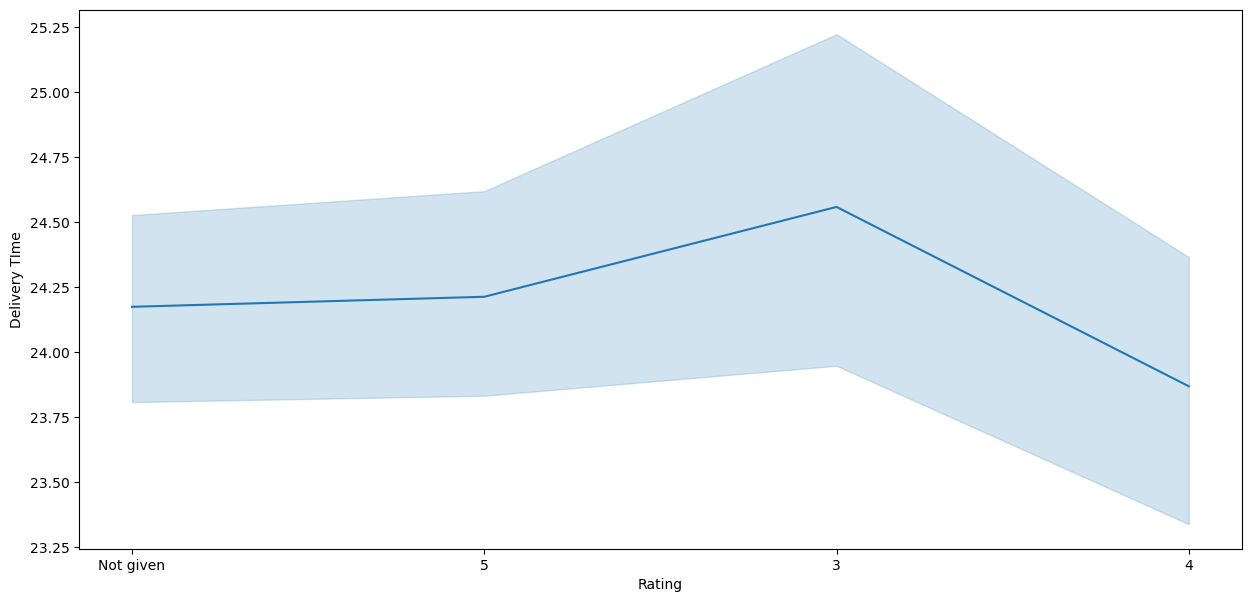

In [186]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'delivery_time', data = df)
plt.ylabel('Delivery TIme')
plt.xlabel('Rating')
plt.show()

#### Observation
We can see that the higher delivery time has lesser rating. 

#### 6. Rating & Food preparation time
#### Analysing result: Impact of Food preparation time on the rating given

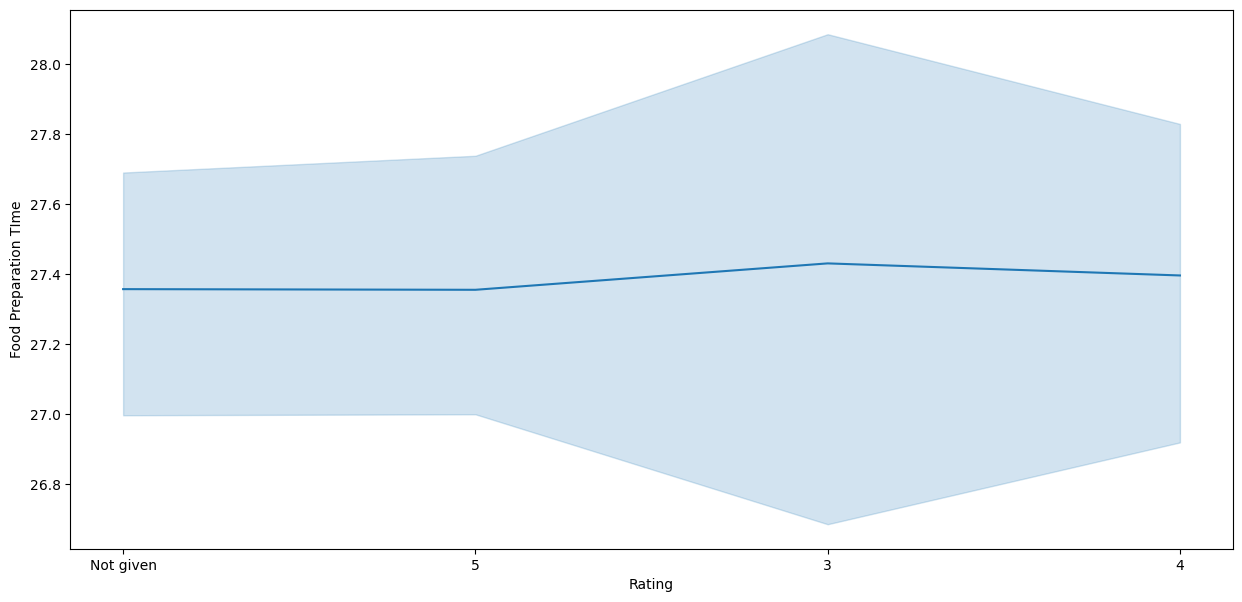

In [187]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.ylabel('Food Preparation TIme')
plt.xlabel('Rating')
plt.show()

#### Observation

Similar to delivery time, there are some instances where we have lower rating for higher food prep time. 

#### 7. Rating & cost of the order
#### Analysing result: Impact of cost of the order on the rating given

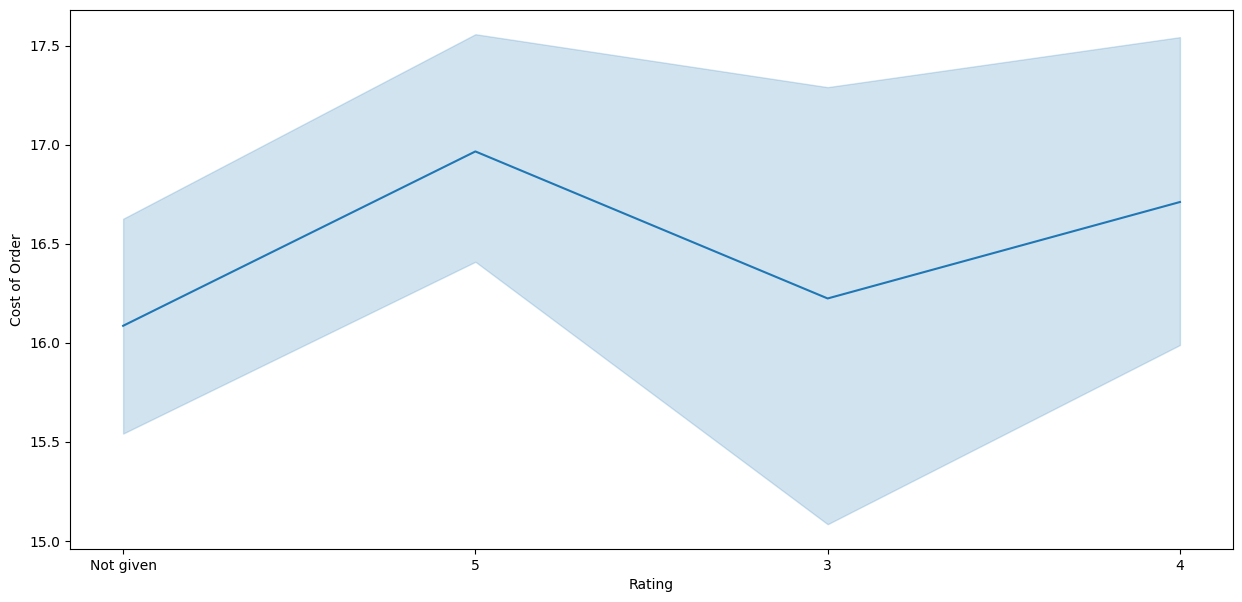

In [188]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.ylabel('Cost of Order')
plt.xlabel('Rating')
plt.show()

#### Observation

1. We can see that some of the orders have less cost and low rating
2. We can also see that more expensive orders have higher ratings.

We can conclude here that the restaurants know the their best selling items that customers like and are available at a higher cost.

#### 8. Cost of the order and cuisine type comparison 
#### Analysing result: This would help the customers identify the cost of a meal based on the cuisine type.


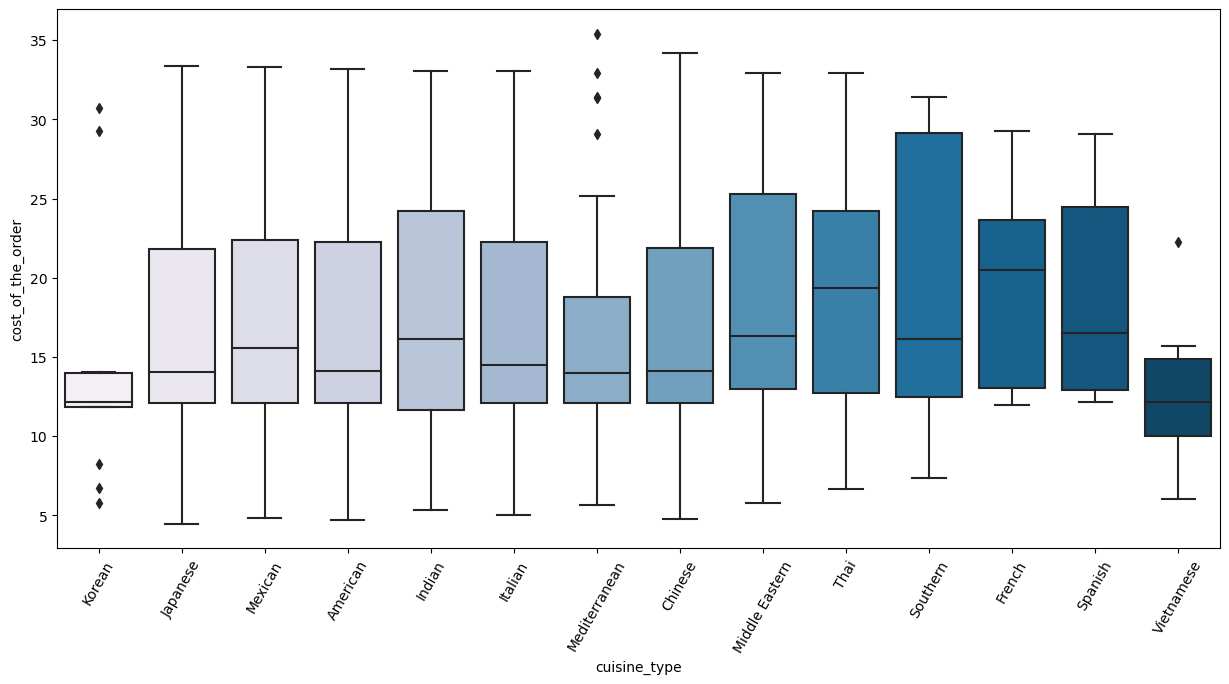

In [189]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()



#### 8.a Cost of the order  - Outlier detection (Korean)

There are some outliers in the Korean cuisines, too costly and too cheap.

#### Korean cuisines above $25

In [190]:
df.loc[(df["cuisine_type"] == 'Korean') & (df["cost_of_the_order"] >25)]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
653,1478363,138024,Cho Dang Gol,Korean,29.25,Weekend,4,23,21,44


#### Korean cuisines below $10






In [106]:
df.loc[(df["cuisine_type"] == 'Korean') & (df["cost_of_the_order"] < 10)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
301,1476856,59674,Woorijip,Korean,8.25,Weekend,3,26,26
464,1477600,347263,Hangawi,Korean,6.74,Weekend,Not given,21,22
1550,1477307,141732,Cho Dang Gol,Korean,5.77,Weekend,5,21,17


#### Observation:

1. Most of the outliers have a rating
2. These dishes were ordered on a weekend

Hence we can conclude that these could be some fancy dishes ordered on the weekend and are not outliers.





#### 8.b Cost of the order  - Outlier detection (Mediterranean)

In [191]:
df.loc[(df["cuisine_type"] == 'Mediterranean') & (df["cost_of_the_order"] > 25)]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
502,1476740,60873,Jack's Wife Freda,Mediterranean,25.17,Weekday,4,31,25,56
524,1476934,126134,Jack's Wife Freda,Mediterranean,32.93,Weekend,3,21,16,37
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,50
858,1476968,99621,Jack's Wife Freda,Mediterranean,29.05,Weekend,5,35,28,63
1132,1477961,167738,Jack's Wife Freda,Mediterranean,31.43,Weekend,5,34,20,54
1148,1478044,354719,Jack's Wife Freda,Mediterranean,31.38,Weekend,Not given,28,18,46


#### Observations:

From the above table we can conclude that:
1. Most of the Mediterranean cuisine above $25 were ordered from the restaurant 'Jack's Wife Freda'.
2. These are not outliers as these cuisines have a high rating of 5 and takes longer to prepare and hence the justified cost.

#### 8.c Cost of the order  - Outlier detection (Vietnamese)

In [192]:
df.loc[(df["cuisine_type"] == 'Vietnamese') & (df["cost_of_the_order"] > 20)]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
746,1477189,54630,V-Nam Cafe,Vietnamese,22.26,Weekend,5,33,26,59


#### Observations:

From the above table we can conclude that:
Similar to Mediterranean, the Vietnamese dish has a 5-star rating and has a longer food prep time and hence the justified cost.

#### Correlation among variables

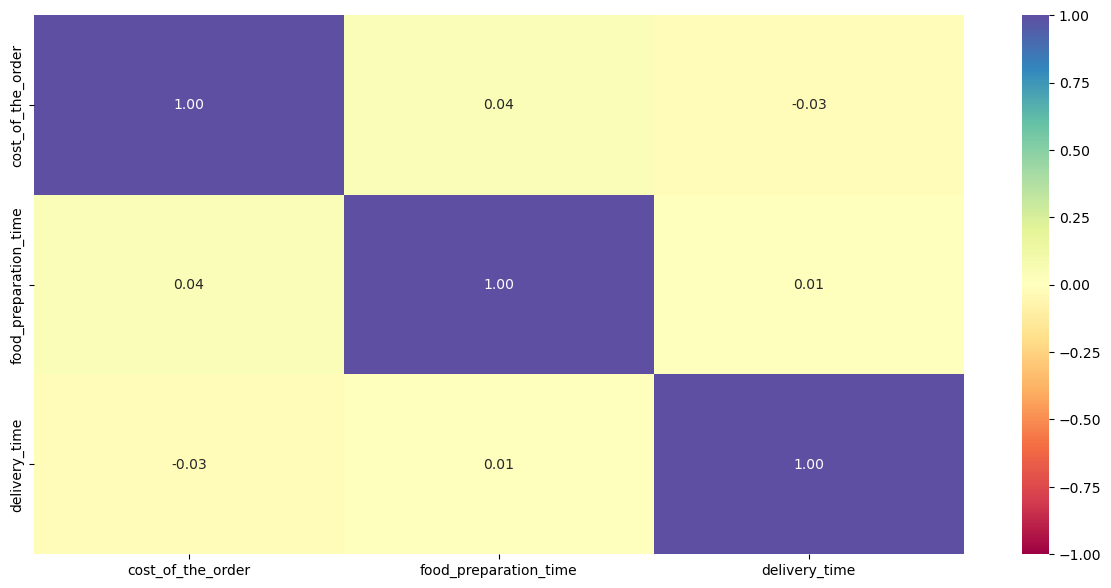

In [193]:
# Heatmap between 'cost_of_the_order', 'food_preparation_time', 'delivery_time'
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation

From the above heatmap, we can see that there is a high correlation between the cost of the order and the food preparation time. 
More expnsive the cuisine, more time the restaurant spends in making the cuisine.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [194]:
def rated_restaurants():
    # Filter the rated restaurants
    df_rated_restaurants = df[df['rating'] != 'Not given'].copy()

    # Convert rating column from object to integer
    df_rated_restaurants['rating'] = df_rated_restaurants['rating'].astype('int')  

    # Create a dataframe that contains the restaurant names with their rating counts
    df_rating_count = df_rated_restaurants.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()

    # Get the restaurant names that have rating count more than 50
    rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

    # Filter to get the data of restaurants that have rating count more than 50
    df_mean_4 = df_rated_restaurants[df_rated_restaurants['restaurant_name'].isin(rest_names)].copy()

    # Group the restaurant names with their ratings and find the mean rating of each restaurant
    df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

    # returning the restataurant names that have a mean rating greater than 4
    return  df_mean_4[df_mean_4['rating'] > 4]
        
print('Restaurants with rating count of more than 50 and the average rating should be greater than 4 are : ')
rated_restaurants()


Restaurants with rating count of more than 50 and the average rating should be greater than 4 are : 


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,40
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,58
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,51
26,1476995,371590,The Meatball Shop,Italian,21.88,Weekday,5,24,27,51
45,1476581,322162,The Meatball Shop,Italian,6.74,Weekend,5,29,23,52
...,...,...,...,...,...,...,...,...,...,...
1872,1477000,328731,Blue Ribbon Fried Chicken,American,29.59,Weekend,5,23,25,48
1879,1477132,110792,Blue Ribbon Sushi,Japanese,12.13,Weekend,5,28,15,43
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,59


In [195]:
rated_restaurants()['cuisine_type'].value_counts()

American    100
Italian      45
Japanese     32
Name: cuisine_type, dtype: int64

In [196]:
rated_restaurants()['restaurant_name'].unique()

array(['Blue Ribbon Fried Chicken', 'Shake Shack', 'The Meatball Shop',
       'Blue Ribbon Sushi'], dtype=object)

#### Observations:
1. American, Italian Japanese cuisines are popular and are rates 4 and above stars
2. From the above result, there are 177 restaurants with an average rating above 4
3. Best restaurants to go for American, Italian Japanese cuisines are: 
        
        (a) 'Blue Ribbon Fried Chicken', 
        
        (b) 'Shake Shack', 
        
        (c) 'The Meatball Shop', 
        
        (d)'Blue Ribbon Sushi'


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [197]:
def company_revenue_generator(cost):
    if (cost > 20):
        return cost*0.25
    elif (cost > 5):
        return cost*0.15
    else:
        return 0
    
def company_revenue():
    df_company_revenue = df.copy()
    df_company_revenue['Revenue'] = df_company_revenue['cost_of_the_order'].apply(company_revenue_generator)
    return df_company_revenue['Revenue'].sum()

print('The total revenue generated by all the orders made by the company is: $',company_revenue())


The total revenue generated by all the orders made by the company is: $ 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

#### Observations:


In [198]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

def highOrderDeliveryTime(deliveryTime):
    return ((df[df['total_time'] > deliveryTime].shape[0]) / (df.shape[0]))*100

    
print ('The percentage of restaurants that take more than 60 minutes to deliver the food are: ', highOrderDeliveryTime(60))    

The percentage of restaurants that take more than 60 minutes to deliver the food are:  10.537407797681771


#### Observations:
Breaking down the above method:
Number of restaurants that take more than 60 minutes: 200

`df[df['total_time'] > 60].shape[0]` 

Total number of restaurants are: 1898

`(df.shape[0])`

Hence the total percentage of restaurants taking more than 60 mins is 200/1898 = 10.5%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [199]:
def mean_delivery_time(day):
    if (day == 'Weekday'):
        return round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean())
    else:
        return round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean())
    
print('The mean delivery time on weekdays is around', mean_delivery_time('Weekday'),' minutes')
print('The mean delivery time on weekend is around', mean_delivery_time('Weekend'),' minutes')

The mean delivery time on weekdays is around 28  minutes
The mean delivery time on weekend is around 22  minutes


#### Observations:

Weekdays the ean delivery time is higher than the weekends.
We can conclude the following from this:

1. As more orders are made by customers on the weekends, the company has more drivers delivering the food on Weekends and hence reducing the delivery time.

2. Better customer experience is more focussed for the delivery time on weekends makeing the delivery faster.

3. We can also conclude that the tips would be better on weekends than on weekdays and hence better delivery times we see on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [164]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


### Conclusions:
#### From the above analysis, we can conclude the following:
1. Shake Shack is the most popular restaurant from the above list in terms of orders received.
2. The avaerage cost of an order is around $12

3. The average food preparation time taken by the restaurants is 27 mins

4. The average food delivery time taken by the restaurants is 24.16 mins
5. Most popular cuisine on weekends is American.
6. Percentage of the orders cost more than 20 dollars = 29.24%
7. The delivery time on weekday is more compared to weekends.
8. The mean food preparation time for all the cuisines are between 24-28 minutes
9. We can see that the higher delivery time has lesser rating.
10. Similar to delivery time, there are some instances where we have lower rating for higher food prep time.
11. We could also conclude here that the restaurants know the their best selling items that customers like and are available at a higher cost.
12. Based on customer orders, Korean, Mediterranean and Vietnamese cuisines also serve some special cuisines that have high rating and takes longer food prep time.
13. There are 177 restaurants with an average rating above 4
14. The total revenue generated by all the orders made by the company is: $ 6166.303
15. The percentage of restaurants that take more than 60 minutes to deliver the food are:  10.5%
16. The mean delivery time on weekdays is around 28  minutes and the mean delivery time on weekend is around 22  minutes
17. American, Italian Japanese cuisines are popular and are rates 4 and above stars

18. From the above result, there are 177 restaurants with an average rating above 4

19. Best restaurants to go for American, Italian Japanese cuisines are:

 (a) 'Blue Ribbon Fried Chicken', 
 
 (b) 'Shake Shack', 
 
 (c) 'The Meatball Shop', 
 
 (d)'Blue Ribbon Sushi'

### Recommendations:

#### Some of the recommendations that the company can make to the customers are:

1. More restaurants can serve American cuisine as that is a much popular cuisine to make more profit.
2. The total food delivery time impacts the rating of the food. Faster prep and delivery will impact the food rating.
3. Customers like  American, Italian Japanese cuisines -> Restaurants can add these to their menu.
4. Weekends the customers order more food and is generally a profit making time. Good food and delivery can make restaurants rating better.
5. The company should work on getting better delivery time on weekdays as well making the overall customer experience better. Based on the analysis, the food delivery time is higher on weekdays. This impacts the customer ratings.
6. Only 29% of the order cost above $20. Restaurants should add more fast-food under $20 to the menu to attract more customers.
7. Only 177 restaurants have an average rating of 4. The Food Hub company should reach out to the restaurants below rating 3 and guide them on getting their  customer ratings better by taking sample data from the 177 restaurants on the things being done right.


---